# 🎯Parkinson's Disease Prediction using Voice Features

Parkinson's Disease is a progressive neurological disorder that affects movement and speech. Early diagnosis is crucial to improve quality of life and slow progression.

This project uses biomedical voice measurements from patients to detect Parkinson’s Disease using machine learning. The features were extracted from sustained phonations and include metrics like frequency variation (jitter), amplitude variation (shimmer), and nonlinear dynamics.

We aim to:
- Build an accurate model to detect Parkinson’s
- Understand which vocal features are most informative
- Deploy the model for clinical or telehealth use


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

df = pd.read_csv('parkinsons.data')
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
print("\n🔹 Dataset Info:")
df.info()



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-n

In [5]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']


In [6]:
print("\n🔹 Null Values:")
print(df.isnull().sum())


🔹 Null Values:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [7]:
print("\n🔹 Dataset Description:")
print(df.describe())



🔹 Dataset Description:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540

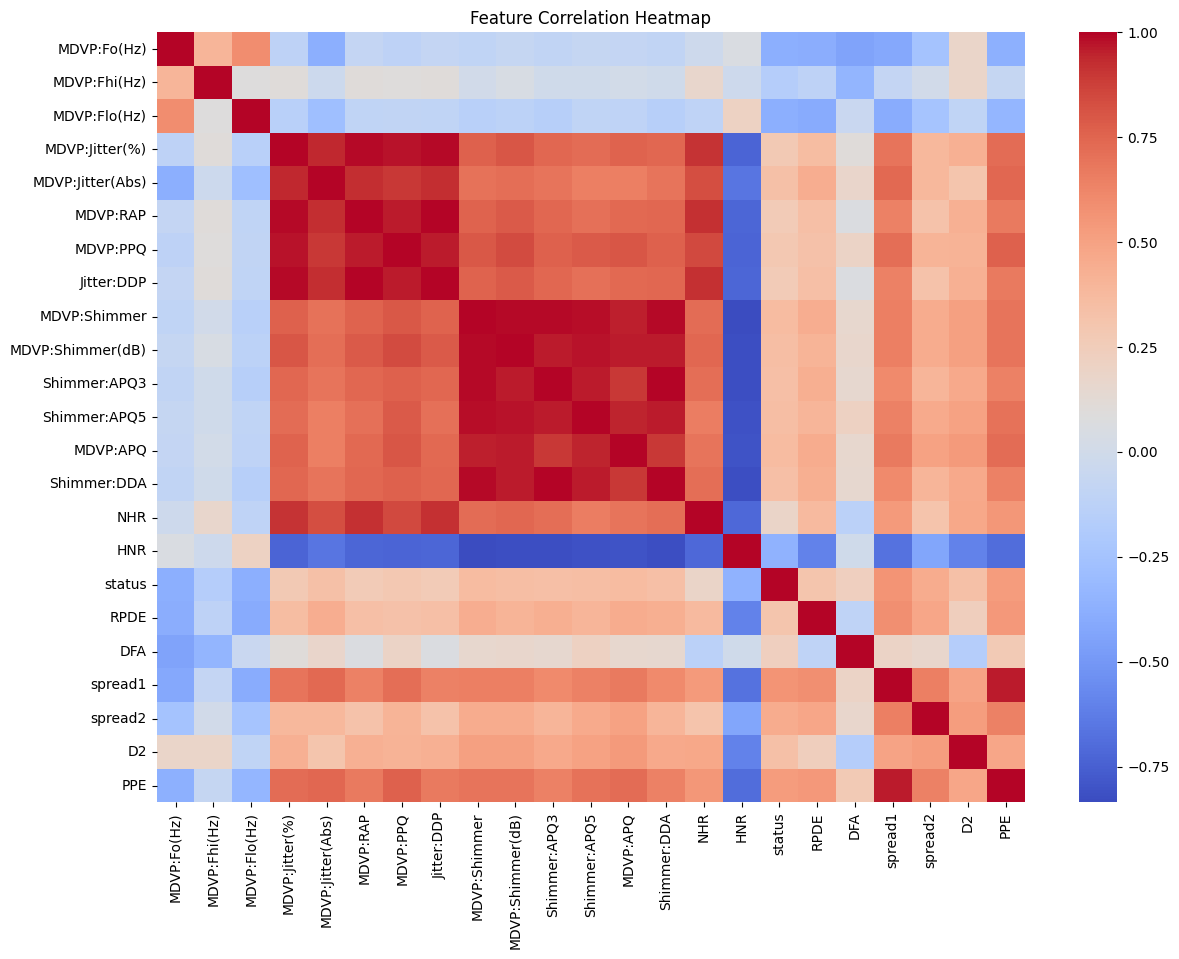

In [8]:
corr_df = df.copy()
if 'name' in corr_df.columns:
    corr_df.drop(columns=["name"], inplace=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

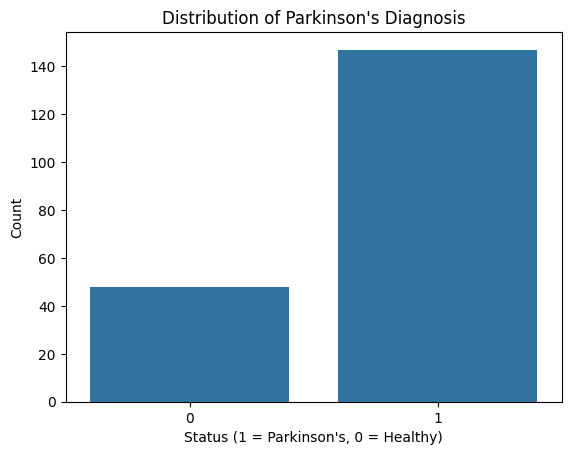

In [9]:
sns.countplot(x='status', data=df)
plt.title("Distribution of Parkinson's Diagnosis")
plt.xlabel("Status (1 = Parkinson's, 0 = Healthy)")
plt.ylabel("Count")
plt.show()

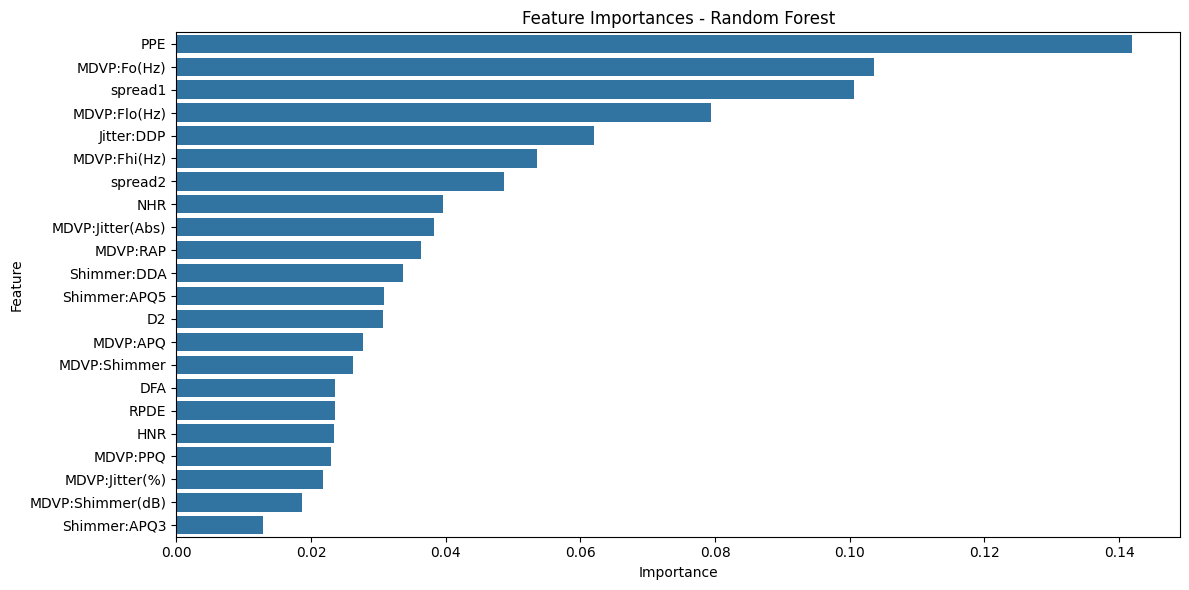

In [10]:
X = df.drop(["name", "status"], axis=1, errors='ignore')
y = df["status"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_df = feature_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=feature_df, x="Importance", y="Feature")
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)

print("\n🔹 Logistic Regression (Baseline) Performance:")
print(classification_report(y_test, baseline_pred))

baseline_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])
print(f"AUC Score: {baseline_auc:.2f}")



🔹 Logistic Regression (Baseline) Performance:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

AUC Score: 0.83


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"\n🔹 Random Forest Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")



🔹 Random Forest Cross-Validation Accuracy: 0.78 ± 0.03



🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


🔹 Confusion Matrix:


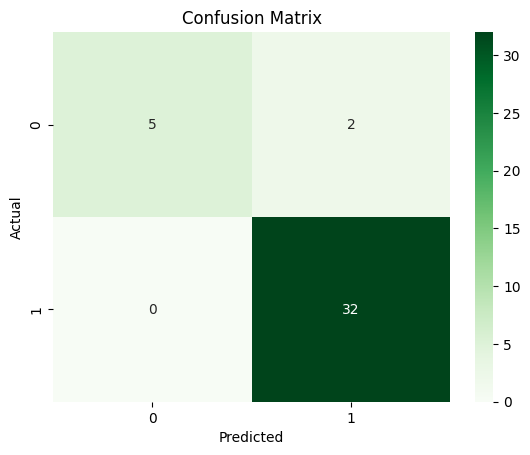

In [13]:
y_pred = model.predict(X_test)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔹 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

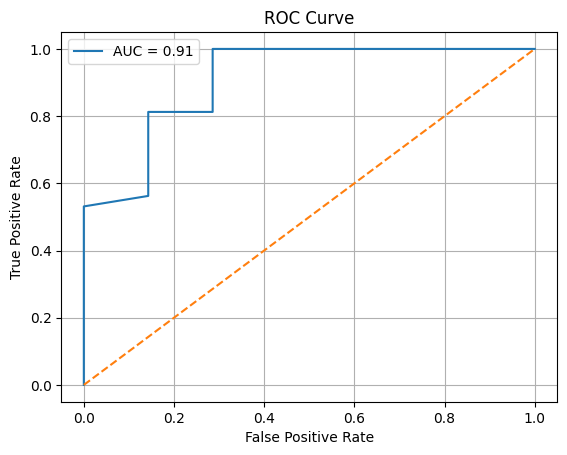

In [14]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=5)
grid_model.fit(X_train, y_train)

print("\n🔹 Best Parameters:")
print(grid_model.best_params_)



🔹 Best Parameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.95


In [17]:
best_model = grid_model.best_estimator_

with open("parkinsons_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\n✅ Final model and scaler saved successfully.")


✅ Final model and scaler saved successfully.


In [18]:
# Test on synthetic patient sample
sample_patient = X_test[0].reshape(1, -1)
sample_proba = model.predict_proba(sample_patient)[0][1]
if sample_proba > 0.7:
    sample_pred = 1
else:
    sample_pred = 0
print(f"Prediction for sample patient: {'Parkinson’s' if sample_pred == 1 else 'Healthy'} ({sample_proba:.2%} confidence)")


Prediction for sample patient: Parkinson’s (99.00% confidence)


In [19]:
# Show versions for reproducibility
import sys
import sklearn
print("\n🔧 Reproducibility Snapshot:")
print(f"Python version: {sys.version}")
print(f"scikit-learn version: {sklearn.__version__}")



🔧 Reproducibility Snapshot:
Python version: 3.10.10 (v3.10.10:aad5f6a891, Feb  7 2023, 08:47:40) [Clang 13.0.0 (clang-1300.0.29.30)]
scikit-learn version: 1.7.0
